Question 1:

In [4]:
import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [6]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("\nMean age per occupation:")
print(mean_age_per_occupation)


Mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [11]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)


occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [13]:
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nMinimum and maximum age per occupation:")
print(min_max_age_per_occupation)



Minimum and maximum age per occupation:
               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [19]:
mean_age_per_occupation_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean age per occupation and sex:")
print(mean_age_per_occupation_and_sex)


Mean age per occupation and sex:
occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986

In [21]:
gender_counts = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
total_counts = gender_counts.sum(axis=1)
gender_percentage = gender_counts.div(total_counts, axis=0) * 100
gender_percentage.columns = ['Female (%)', 'Male (%)']
print("\nPercentage of women and men per occupation:")
print(gender_percentage)


Percentage of women and men per occupation:
               Female (%)    Male (%)
occupation                           
administrator   45.569620   54.430380
artist          46.428571   53.571429
doctor           0.000000  100.000000
educator        27.368421   72.631579
engineer         2.985075   97.014925
entertainment   11.111111   88.888889
executive        9.375000   90.625000
healthcare      68.750000   31.250000
homemaker       85.714286   14.285714
lawyer          16.666667   83.333333
librarian       56.862745   43.137255
marketing       38.461538   61.538462
none            44.444444   55.555556
other           34.285714   65.714286
programmer       9.090909   90.909091
retired          7.142857   92.857143
salesman        25.000000   75.000000
scientist        9.677419   90.322581
student         30.612245   69.387755
technician       3.703704   96.296296
writer          42.222222   57.777778


Question 2:

In [28]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [42]:
goals = euro12['Goals']
print("\nGoals column:")
print(goals)


Goals column:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [32]:
num_teams = euro12['Team'].nunique()
print(f"\nNumber of teams that participated in Euro 2012: {num_teams}")



Number of teams that participated in Euro 2012: 16


In [34]:
num_columns = euro12.shape[1]
print(f"\nNumber of columns in the dataset: {num_columns}")



Number of columns in the dataset: 35


In [38]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:")
discipline


Discipline DataFrame:


,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [56]:
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nTeams sorted by Red Cards, then Yellow Cards:")
sorted_discipline


Teams sorted by Red Cards, then Yellow Cards:


,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [54]:
mean_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [60]:
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams that scored more than 6 goals:")
teams_more_than_6_goals[['Team', 'Goals']]


Teams that scored more than 6 goals:


,Team,Goals
5,Germany,10
13,Spain,12


In [66]:
Teams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

In [70]:
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 columns:")
print(first_7_columns)


First 7 columns:
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13              

In [72]:
all_except_last_3 = euro12.iloc[:, :-3]
print("\nAll columns except the last 3:")
print(all_except_last_3)


All columns except the last 3:
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13

In [74]:
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy)


Shooting Accuracy for England, Italy, and Russia:
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


Question 3:


In [85]:
import numpy as np
np.random.seed(0)
series1 = pd.Series(np.random.randint(1, 5, 100))  
series2 = pd.Series(np.random.randint(1, 4, 100))  
series3 = pd.Series(np.random.randint(10000, 30001, 100))
df = pd.concat([series1, series2, series3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("DataFrame with renamed columns:")
print(df.head())

DataFrame with renamed columns:
   bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340


In [87]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
print("\nOne-column DataFrame:")
print(bigcolumn)


One-column DataFrame:
     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


In [91]:
print(f"\nDoes the index go only until 99? {bigcolumn.index[-1] == 99}")
bigcolumn = bigcolumn.reindex(range(300)).reset_index(drop=True)
print("\nReindexed DataFrame:")
print(bigcolumn)


Does the index go only until 99? False

Reindexed DataFrame:
     bigcolumn
0            1
1            4
2            2
3            1
4            4
..         ...
295      28161
296      29745
297      18338
298      24676
299      12562

[300 rows x 1 columns]


Question 4:

In [290]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')
data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\patel\AppData\Local\Temp\ipykernel_17264\1192012223.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [294]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [296]:
print("\nMissing values per location:")
missing_values = data.isnull().sum()
print(missing_values)


Missing values per location:
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [147]:
print("\nTotal number of non-missing values in the dataset:")
total_non_missing = data.notnull().sum().sum()
print(total_non_missing)


Total number of non-missing values in the dataset:
98579


In [149]:
mean_wind_speed = data.mean().mean()
print("\nMean wind speed across locations and time:", mean_wind_speed)



Mean wind speed across locations and time: 14.299199599246569


In [151]:
print("\nCalculating statistics for each location (min, max, mean, std):")
loc_stats = data.describe().transpose()
print(loc_stats[['min', 'mean', 'std', 'max']])


Calculating statistics for each location (min, max, mean, std):
       min       mean       std    max
Yr   61.00  69.500304  5.188131  78.00
Mo    1.00   6.523274  3.448871  12.00
Dy    1.00  15.728628  8.800335  31.00
RPT   0.67  12.362987  5.618413  35.80
VAL   0.21  10.644314  5.267356  33.37
ROS   1.50  11.660526  5.008450  33.84
KIL   0.00   6.306468  3.605811  28.46
SHA   0.13  10.455834  4.936125  37.54
BIR   0.00   7.092254  3.968683  26.16
DUB   0.00   9.797343  4.977555  30.37
CLA   0.00   8.495053  4.499449  31.08
MUL   0.00   8.493590  4.166872  25.88
CLO   0.04   8.707332  4.503954  28.21
BEL   0.13  13.121007  5.835037  42.38
MAL   0.67  15.599079  6.699794  42.54


In [153]:
day_stats = data.apply(lambda row: row.min(), axis=1)
print("\nDaily wind statistics summary for min values across locations:")
print(day_stats)


Daily wind statistics summary for min values across locations:
date
2061-01-01    1.00
2061-01-02    1.00
2061-01-03    1.00
2061-01-04    1.00
2061-01-05    1.00
              ... 
1978-12-27    8.08
1978-12-28    5.00
1978-12-29    8.71
1978-12-30    9.13
1978-12-31    9.59
Length: 6574, dtype: float64


In [155]:
print("\nMonthly averages for January across locations:")
january_data = data[data.index.month == 1]
jan_means = january_data.mean().mean()
print(jan_means)


Monthly averages for January across locations:
15.199402556679008


Question 5:

In [161]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [163]:
print("\nNumber of observations (rows) in the dataset:", len(chipo))


Number of observations (rows) in the dataset: 4622


In [165]:
print("\nNumber of columns in the dataset:", len(chipo.columns))


Number of columns in the dataset: 5


In [167]:
print("\nNames of the columns:")
print(chipo.columns)


Names of the columns:
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [169]:
print("\nDataset Index:")
print(chipo.index)


Dataset Index:
RangeIndex(start=0, stop=4622, step=1)


In [171]:
most_ordered_item = chipo['item_name'].value_counts().head(1)
print("\nMost-ordered item:")
print(most_ordered_item)


Most-ordered item:
item_name
Chicken Bowl    726
Name: count, dtype: int64


In [173]:
most_ordered_item_name = most_ordered_item.index[0]
num_orders = chipo[chipo['item_name'] == most_ordered_item_name].shape[0]
print("\nNumber of times", most_ordered_item_name, "was ordered:", num_orders)



Number of times Chicken Bowl was ordered: 726


In [175]:
most_ordered_choice = chipo['choice_description'].value_counts().head(1)
print("\nMost ordered item in choice_description column:")
print(most_ordered_choice)


Most ordered item in choice_description column:
choice_description
[Diet Coke]    134
Name: count, dtype: int64


In [177]:
total_items_ordered = chipo['quantity'].sum()
print("\nTotal number of items ordered:", total_items_ordered)


Total number of items ordered: 4972


In [183]:
print("\nData type of item_price:", chipo['item_price'].dtype)


Data type of item_price: float64


In [185]:
print("\nAfter using lambda, data type of item_price:", chipo['item_price'].dtype)



After using lambda, data type of item_price: float64


In [187]:
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("\nTotal revenue generated during the dataset period:", total_revenue)



Total revenue generated during the dataset period: 39237.02


In [191]:
total_orders = chipo['order_id'].nunique()
print("\nNumber of orders placed in the dataset period:", total_orders)


Number of orders placed in the dataset period: 1834


In [193]:
average_revenue_per_order = total_revenue / total_orders
print("\nAverage revenue amount per order:", average_revenue_per_order)


Average revenue amount per order: 21.39423118865867


In [196]:
num_different_items = chipo['item_name'].nunique()
print("\nNumber of different items sold:", num_different_items)


Number of different items sold: 50


Question 6:

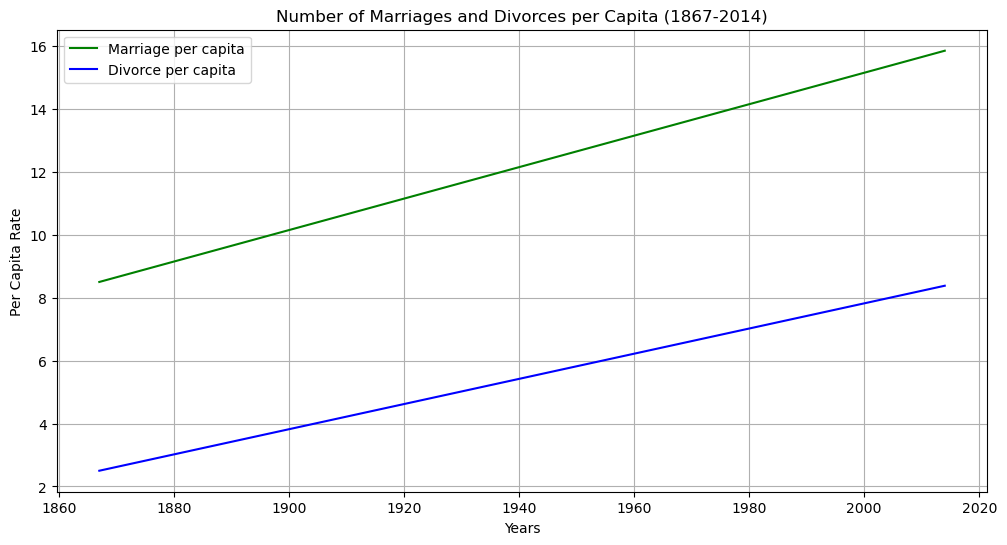

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Year": list(range(1867, 2015)),
    "Marriage per capita": [8.5 + (0.05 * i) for i in range(148)], 
    "Divorce per capita": [2.5 + (0.04 * i) for i in range(148)] 
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Marriage per capita'], label='Marriage per capita', color='g')
plt.plot(df['Year'], df['Divorce per capita'], label='Divorce per capita', color='b')
plt.title('Number of Marriages and Divorces per Capita (1867-2014)')
plt.xlabel('Years')
plt.ylabel('Per Capita Rate')
plt.legend()

# Show chart
plt.grid(True)
plt.show()



Question 7:

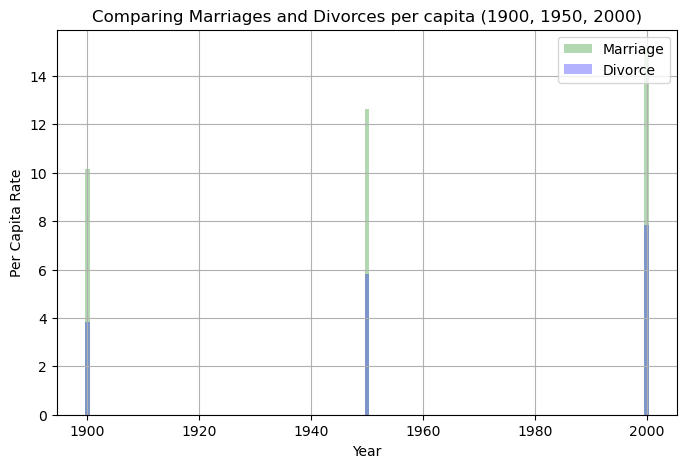

In [220]:
years_interest = [1900, 1950, 2000]
subset_df = df[df['Year'].isin(years_interest)]

plt.figure(figsize=(8, 5))

plt.bar(subset_df['Year'], subset_df['Marriage per capita'], color='g', alpha=0.3, label='Marriage')
plt.bar(subset_df['Year'], subset_df['Divorce per capita'], color='b', alpha=0.3, label='Divorce')

plt.title("Comparing Marriages and Divorces per capita (1900, 1950, 2000)")
plt.xlabel("Year")
plt.ylabel('Per Capita Rate')
plt.legend(loc='upper right')
plt.grid()

plt.show()

Question 8:

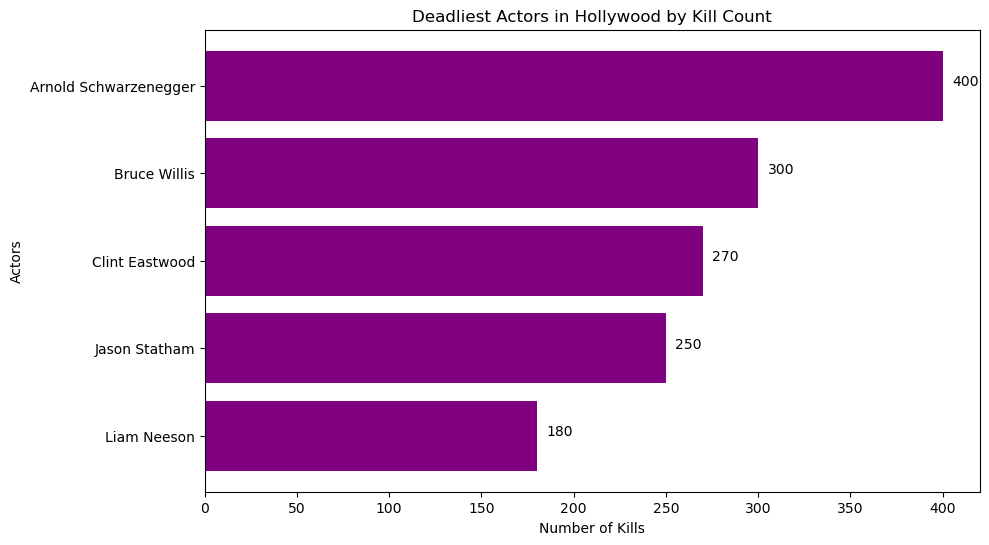

In [270]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Actor': ['Bruce Willis', 'Jason Statham', 'Liam Neeson', 'Arnold Schwarzenegger', 'Clint Eastwood'],
    'Kill Count': [300, 250, 180, 400, 270]
}

# Create a DataFrame
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='Kill Count')

plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Actor'], df_sorted['Kill Count'], color='purple')

plt.title('Deadliest Actors in Hollywood by Kill Count')
plt.xlabel('Number of Kills')
plt.ylabel('Actors')

for index, value in enumerate(df_sorted['Kill Count']):
    plt.text(value + 5, index, f'{value}')

plt.show()


Question 9:

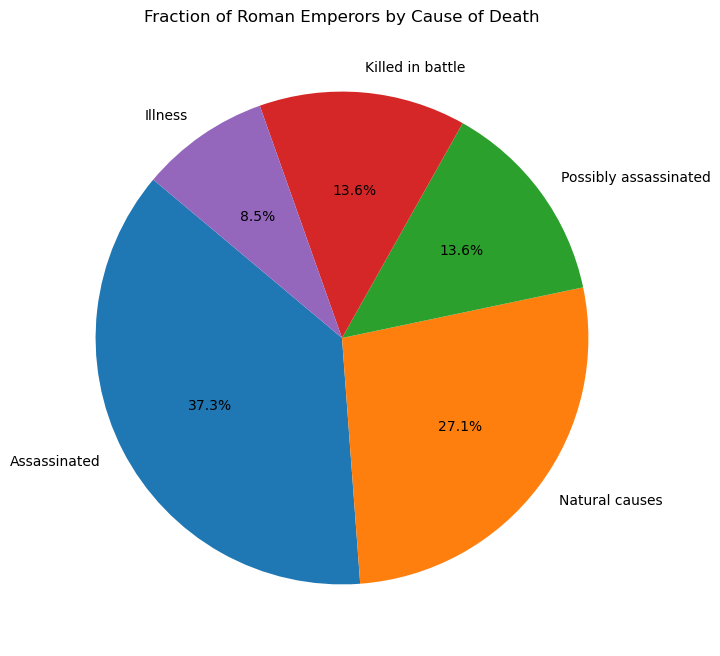

In [276]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the dataset with assassination statuses and their counts
data = {
    'Status': [
        'Assassinated',
        'Natural causes',
        'Possibly assassinated',
        'Killed in battle',
        'Illness',

    ],
    'Count': [22, 16, 8, 8, 5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Count'], labels=df['Status'], autopct='%1.1f%%', startangle=140)
plt.title('Fraction of Roman Emperors by Cause of Death')

plt.show()


Question 10:

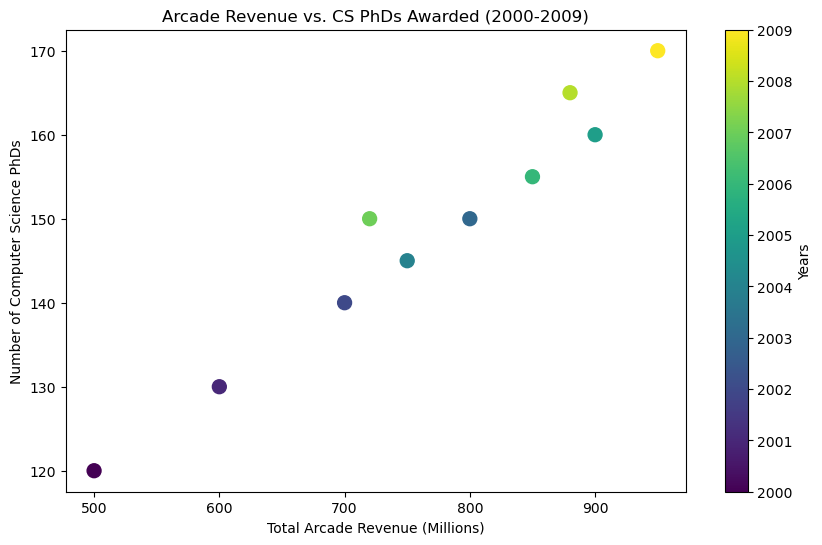

In [278]:
import matplotlib.pyplot as plt
import pandas as pd

years = list(range(2000, 2010))
arcade_revenue = [500, 600, 700, 800, 750, 900, 850, 720, 880, 950]
phds_awarded = [120, 130, 140, 150, 145, 160, 155, 150, 165, 170]

df = pd.DataFrame({'Year': years, 'Arcade Revenue': arcade_revenue, 'CS PhDs': phds_awarded})

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Arcade Revenue'], df['CS PhDs'], c=df['Year'], cmap='viridis', s=100)
plt.colorbar(scatter, label='Years')

plt.title('Arcade Revenue vs. CS PhDs Awarded (2000-2009)')
plt.xlabel('Total Arcade Revenue (Millions)')
plt.ylabel('Number of Computer Science PhDs')

plt.show()
